In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [22]:
df = pd.read_csv('Carulla.csv')
df.head()

,FechaTransaccion,IdTransaccion,IdCliente,CdCadena,IdCiudad,SUM_of_VlrVentasConImpuestos
0,25MAR2021,4851730852,5104794.0,C,11001,5.3061
1,12MAR2021,4843248812,NaN,C,11001,1421.3889
2,02APR2021,4857458053,5434724.0,C,11001,4.5000
3,08JUN2021,4895680758,NaN,C,8573,53.2139
4,25APR2021,4869694458,NaN,C,5001,1.8333


In [23]:
df.describe()

,IdTransaccion,IdCliente,IdCiudad,SUM_of_VlrVentasConImpuestos
count,1.034479e+08,6.987576e+07,1.034479e+08,1.034479e+08
mean,5.182879e+09,2.691689e+07,1.636048e+04,5.068175e+01
std,2.246505e+08,4.326381e+07,1.767427e+04,1.789714e+02
min,4.800820e+09,1.400000e+01,5.001000e+03,1.776357e-15
25%,4.986553e+09,3.619066e+06,1.100100e+04,4.578400e+00
50%,5.178123e+09,7.221785e+06,1.100100e+04,1.305710e+01
75%,5.378680e+09,2.709722e+07,1.100100e+04,3.715160e+01
max,5.576283e+09,1.523072e+08,7.689200e+04,4.378222e+04


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103447929 entries, 0 to 103447928
Data columns (total 6 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   FechaTransaccion              object 
 1   IdTransaccion                 int64  
 2   IdCliente                     float64
 3   CdCadena                      object 
 4   IdCiudad                      int64  
 5   SUM_of_VlrVentasConImpuestos  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.6+ GB


In [27]:
nulos_id_cliente = df['IdCliente'].isnull().sum()
print(f"El número de valores nulos en la columna 'IdCliente' es: {nulos_id_cliente}")
nulos_fecha = df['FechaTransaccion'].isnull().sum()
print(f"El número de valores nulos en la columna 'FechaTransaccion' es: {nulos_fecha}")
transaccion = df['IdTransaccion'].isnull().sum()
print(f"El número de valores nulos en la columna 'ValorTransaccion' es: {transaccion}")
ciudad = df['IdCiudad'].isnull().sum()
print(f"El número de valores nulos en la columna 'IdCiudad' es: {ciudad}")
valor = df['SUM_of_VlrVentasConImpuestos'].isnull().sum()
print(f"El número de valores nulos en la columna 'SUM_of_VlrVentasConImpuestos' es: {valor}")

El número de valores nulos en la columna 'IdCliente' es: 0
El número de valores nulos en la columna 'FechaTransaccion' es: 0
El número de valores nulos en la columna 'ValorTransaccion' es: 0
El número de valores nulos en la columna 'IdCiudad' es: 0
El número de valores nulos en la columna 'SUM_of_VlrVentasConImpuestos' es: 0


In [28]:
#eliminar las filas que contengan los valores nulos y además eliminar la columna CdCadena ya que no es relevante para el análisis
df = df.dropna()
df.reset_index(drop=True, inplace=True)
if 'CdCadena' in df.columns:
    df = df.drop(columns=['CdCadena'])


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69875755 entries, 0 to 69875754
Data columns (total 5 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   FechaTransaccion              object 
 1   IdTransaccion                 int64  
 2   IdCliente                     float64
 3   IdCiudad                      int64  
 4   SUM_of_VlrVentasConImpuestos  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ GB


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
cols_to_normalize = ['IdTransaccion', 'IdCliente', 'IdCiudad', 'SUM_of_VlrVentasConImpuestos']

scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


In [31]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[cols_to_normalize])


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


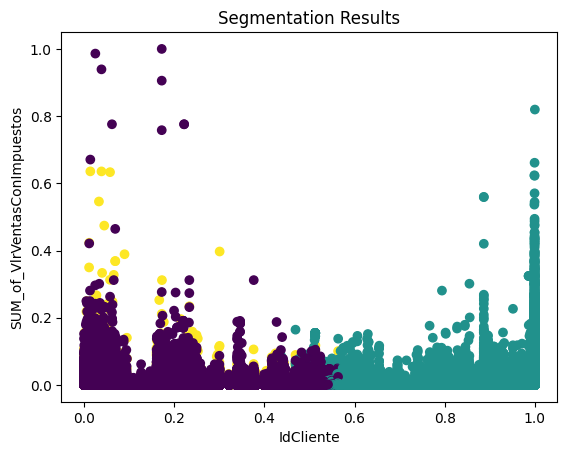

In [32]:
import matplotlib.pyplot as plt

# Scatter plot of 'IdCliente' vs. 'SUM_of_VlrVentasConImpuestos' colored by cluster
plt.scatter(df['IdCliente'], df['SUM_of_VlrVentasConImpuestos'], c=df['Cluster'])
plt.xlabel('IdCliente')
plt.ylabel('SUM_of_VlrVentasConImpuestos')
plt.title('Segmentation Results')
plt.show()



In [33]:
cluster_means = df.groupby('Cluster')['SUM_of_VlrVentasConImpuestos'].mean()
print(cluster_means)


Cluster
0    0.001048
1    0.001022
2    0.001036
Name: SUM_of_VlrVentasConImpuestos, dtype: float64


El Cluster 0 tiene un valor promedio de 'SUM_of_VlrVentasConImpuestos' de aproximadamente 0.001048.
El Cluster 1 tiene un valor promedio de 'SUM_of_VlrVentasConImpuestos' de aproximadamente 0.001022.
El Cluster 2 tiene un valor promedio de 'SUM_of_VlrVentasConImpuestos' de aproximadamente 0.001036.
Dado que las diferencias entre estos valores son bastante pequeñas, podrías considerar categorizarlos de la siguiente manera:

Cluster 0: Ventas Bajas
Cluster 1: Ventas Medianas
Cluster 2: Ventas Altas

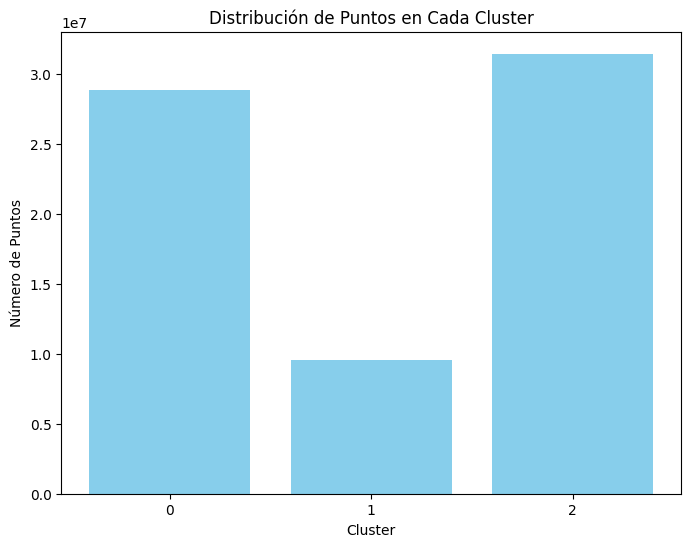

In [35]:
cluster_counts = df['Cluster'].value_counts().sort_index()

# Crea un gráfico de barras.
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Número de Puntos')
plt.title('Distribución de Puntos en Cada Cluster')
plt.xticks(cluster_counts.index)
plt.show()

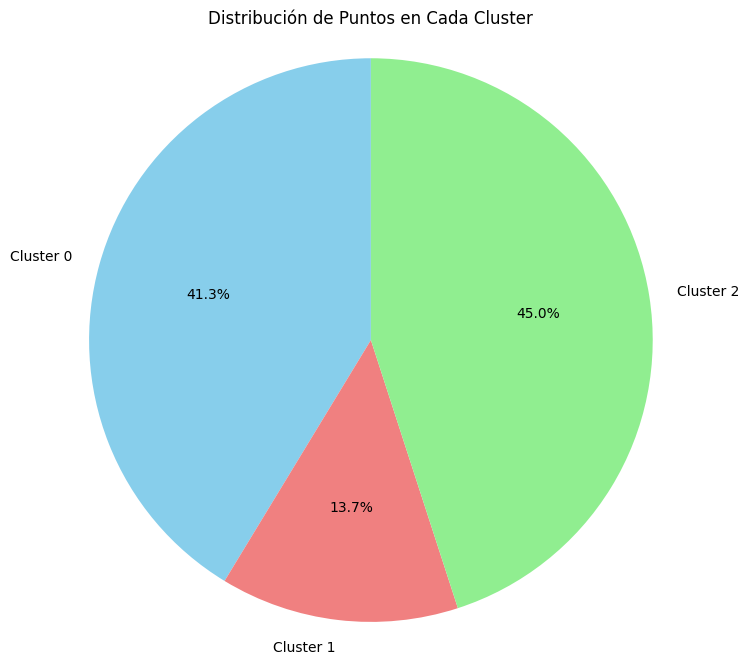

In [36]:
# Calcula el conteo de puntos en cada grupo.
cluster_counts = df['Cluster'].value_counts().sort_index()

# Etiquetas para los grupos
cluster_labels = [f'Cluster {cluster}' for cluster in cluster_counts.index]

# Colores para el gráfico circular
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Crea un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Puntos en Cada Cluster')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo y no una elipse

plt.show()